In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_kendall_tau_heatmaps_with_difference(df1, df2, title1=' Heatmap (Full Range)', 
                                              title2=' Heatmap (Mid Range)', 
                                              diff_title='Difference (Full - Mid Range)',metric = 'KendallTau',model_order = ['MLP', 'XGB', 'RF', 'RF_SHORT', 'RIDGE'],descriptor_order = ['mfp3', 'RDKit_PhysChem', 'mfp0']):
    """
    Plot two heatmaps for Kendall Tau values with confidence intervals side-by-side, 
    and a third heatmap showing the differences between the two.

    Parameters:
    df1 (pd.DataFrame): DataFrame for the first heatmap with columns ['Model', 'Descriptor', 'Metric', 'Mean', 'CI_Low', 'CI_High']
    df2 (pd.DataFrame): DataFrame for the second heatmap with columns ['Model', 'Descriptor', 'Metric', 'Mean', 'CI_Low', 'CI_High']
    title1 (str): Title of the first heatmap
    title2 (str): Title of the second heatmap
    diff_title (str): Title of the difference heatmap
    """
    # Define model and descriptor orders for sorting
    title1 = metric + title1
    title2 = metric + title2
    df1 = df1[df1['Metric'] == metric]
    df2 = df2[df2['Metric'] == metric]

    # Filter for Kendall Tau metric and prepare DataFrames
    for df in [df1, df2]:
        df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
        df['Descriptor'] = pd.Categorical(df['Descriptor'], categories=descriptor_order, ordered=True)
    
    df1 = df1[df1['Metric'] == metric].sort_values(['Descriptor', 'Model'])
    df2 = df2[df2['Metric'] == metric].sort_values(['Descriptor', 'Model'])

    heatmap_data1 = df1.pivot(index='Descriptor', columns='Model', values='Mean')
    heatmap_data2 = df2.pivot(index='Descriptor', columns='Model', values='Mean')

    # Calculate the difference between the two heatmaps
    heatmap_diff = heatmap_data1 - heatmap_data2

    # Get the maximum absolute difference for symmetric color scaling
    max_diff = np.max(np.abs(heatmap_diff.values))

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(36, 10))

    # Plot first heatmap
    sns.heatmap(heatmap_data1, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True, ax=axes[0])
    axes[0].set_title(title1)
    axes[0].set_xlabel('Model')
    axes[0].set_ylabel('Descriptor')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].tick_params(axis='y', rotation=0)

    # Add text annotations for mean and CI to the first heatmap
    for i in range(heatmap_data1.shape[0]):
        for j in range(heatmap_data1.shape[1]):
            mean_val = heatmap_data1.iloc[i, j]
            if not pd.isnull(mean_val):
                ci_low = df1[
                    (df1['Descriptor'] == heatmap_data1.index[i]) &
                    (df1['Model'] == heatmap_data1.columns[j])
                ]['CI_Low'].values[0]
                ci_high = df1[
                    (df1['Descriptor'] == heatmap_data1.index[i]) &
                    (df1['Model'] == heatmap_data1.columns[j])
                ]['CI_High'].values[0]
                annotation_text = f"{mean_val:.2f}\n({ci_low:.2f}-{ci_high:.2f})"
                axes[0].text(j + 0.5, i + 0.5, annotation_text, ha='center', va='center', color='black', fontsize=8)

    # Plot second heatmap
    sns.heatmap(heatmap_data2, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True, ax=axes[1])
    axes[1].set_title(title2)
    axes[1].set_xlabel('Model')
    axes[1].set_ylabel('Descriptor')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='y', rotation=0)

    # Add text annotations for mean and CI to the second heatmap
    for i in range(heatmap_data2.shape[0]):
        for j in range(heatmap_data2.shape[1]):
            mean_val = heatmap_data2.iloc[i, j]
            if not pd.isnull(mean_val):
                ci_low = df2[
                    (df2['Descriptor'] == heatmap_data2.index[i]) &
                    (df2['Model'] == heatmap_data2.columns[j])
                ]['CI_Low'].values[0]
                ci_high = df2[
                    (df2['Descriptor'] == heatmap_data2.index[i]) &
                    (df2['Model'] == heatmap_data2.columns[j])
                ]['CI_High'].values[0]
                annotation_text = f"{mean_val:.2f}\n({ci_low:.2f}-{ci_high:.2f})"
                axes[1].text(j + 0.5, i + 0.5, annotation_text, ha='center', va='center', color='black', fontsize=8)

    # Plot difference heatmap with centered color scale at 0
    sns.heatmap(heatmap_diff, annot=True, cmap='coolwarm', vmin=-max_diff, vmax=max_diff, center=0,
                fmt=".2f", linewidths=0.5, cbar=True, ax=axes[2])
    axes[2].set_title(diff_title)
    axes[2].set_xlabel('Model')
    axes[2].set_ylabel('Descriptor')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].tick_params(axis='y', rotation=0)

    plt.tight_layout()
    plt.show()

In [8]:
from utils.visualization import compile_metrics_dataframe
data_path = 'results/overfitting_check_different_train_ranges_Counts.pkl'
df_metrics_full_train_range_counts_and_physchem = compile_metrics_dataframe(data_path,train_set='full_range')
df_metrics_full_mid_range_counts_and_physchem = compile_metrics_dataframe(data_path,train_set='mid_range')

/tmp/ipykernel_3531077/676364840.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
/tmp/ipykernel_3531077/676364840.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Descriptor'] = pd.Categorical(df['Descriptor'], categories=descriptor_order, ordered=True)


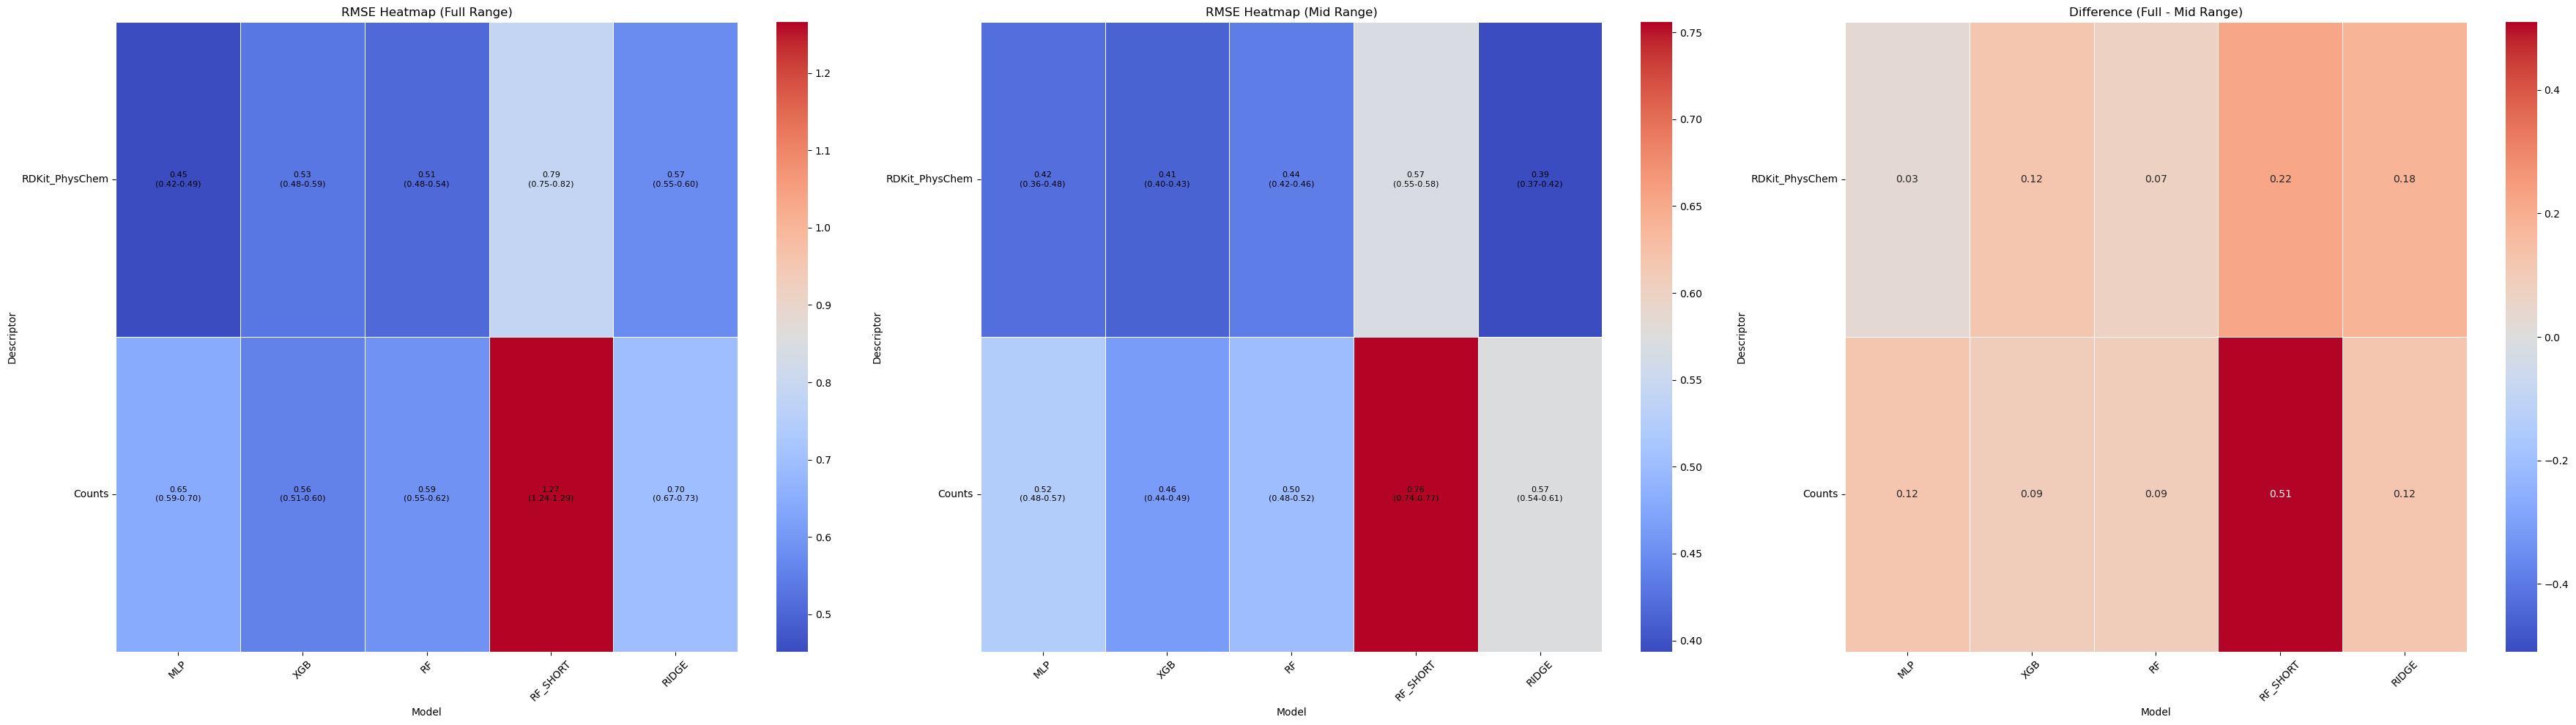

In [9]:
plot_kendall_tau_heatmaps_with_difference(df_metrics_full_train_range_counts_and_physchem, df_metrics_full_mid_range_counts_and_physchem, metric='RMSE',descriptor_order=['RDKit_PhysChem', 'Counts'])

/tmp/ipykernel_3531077/676364840.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
/tmp/ipykernel_3531077/676364840.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Descriptor'] = pd.Categorical(df['Descriptor'], categories=descriptor_order, ordered=True)


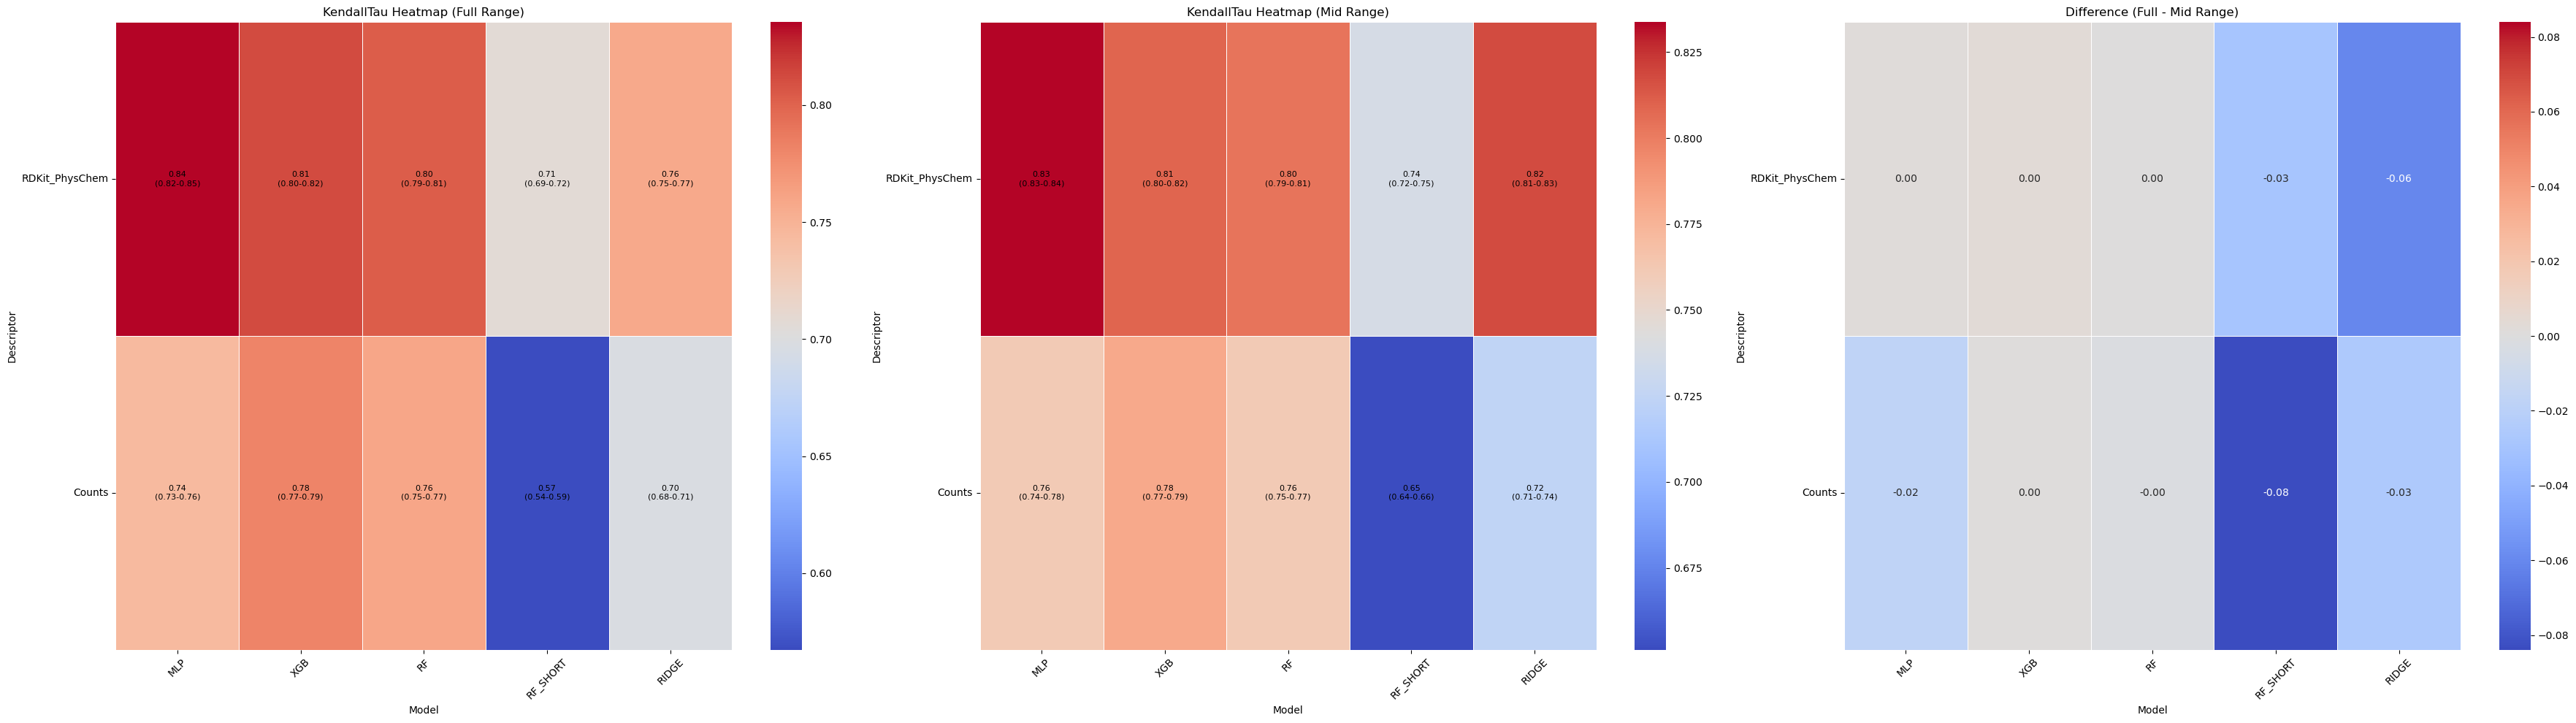

In [10]:
plot_kendall_tau_heatmaps_with_difference(df_metrics_full_train_range_counts_and_physchem, df_metrics_full_mid_range_counts_and_physchem, metric='KendallTau',descriptor_order=['RDKit_PhysChem', 'Counts'])

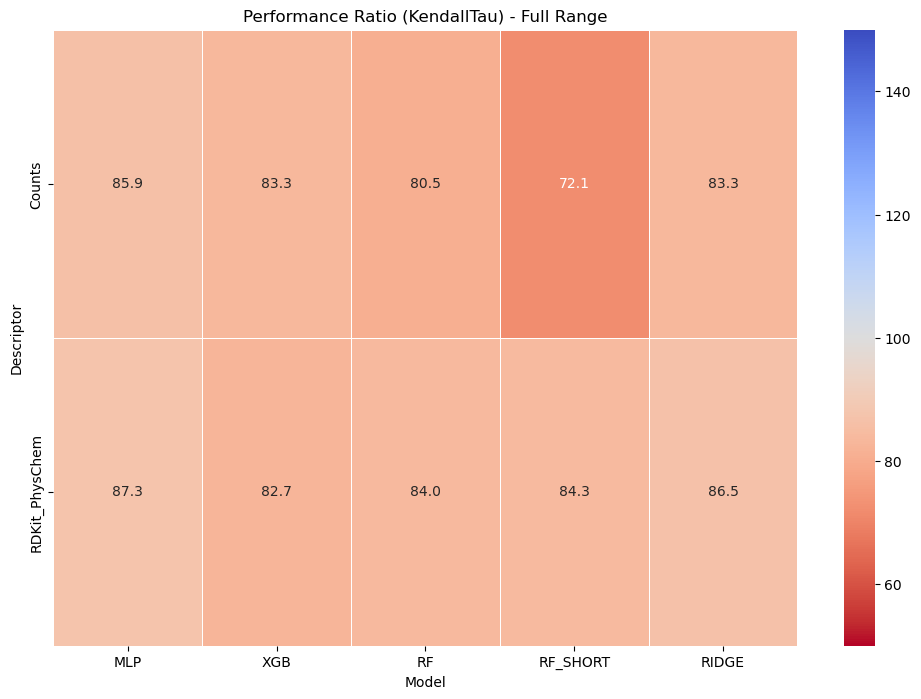

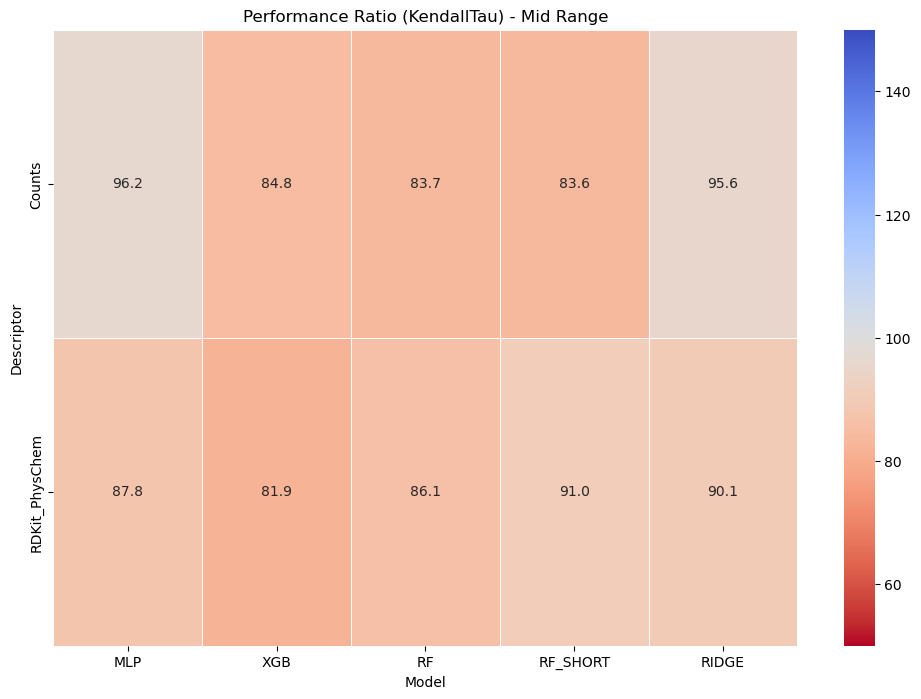

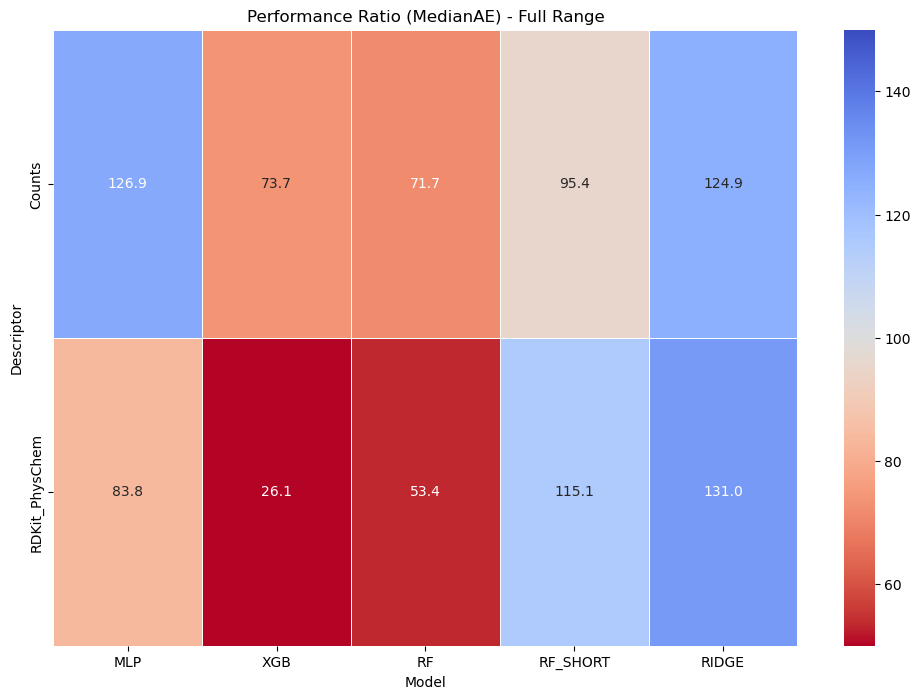

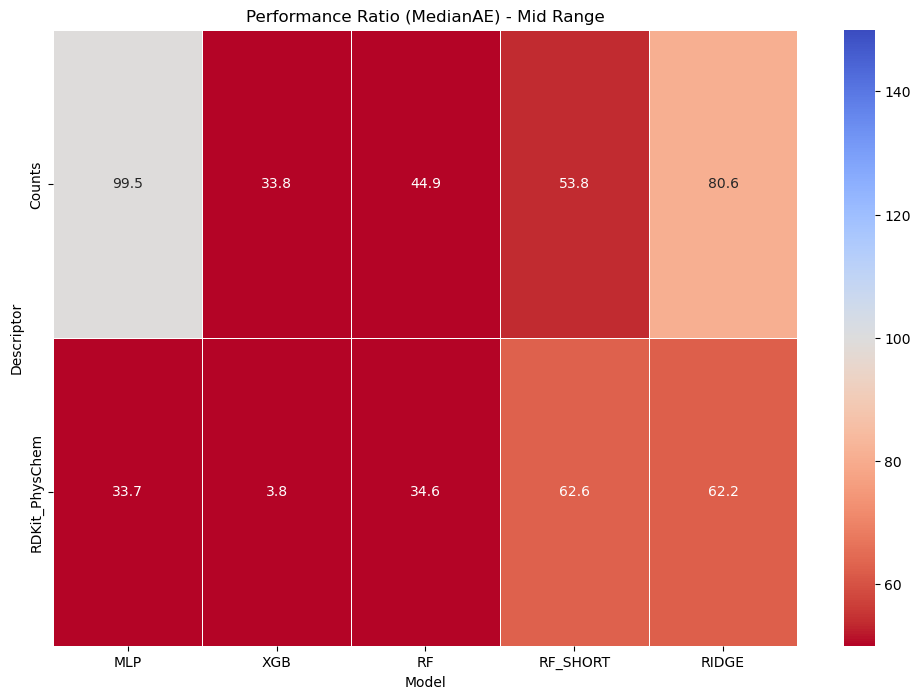

In [15]:
import pandas as pd
import numpy as np
from utils.stats import get_stats
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(train_path_full, train_path_mid, test_path):
    train_data_full = pd.read_pickle(train_path_full)
    train_data_mid = pd.read_pickle(train_path_mid)
    test_data = pd.read_pickle(test_path)
    return train_data_full, train_data_mid, test_data

def calculate_metrics(reals_list, predictions_list, metric_names=['KendallTau', 'RMSE', 'MAE', 'MedianAE']):
    metrics = {metric: [] for metric in metric_names}
    for real, pred in zip(reals_list, predictions_list):
        for metric_name in metric_names:
            metric_vals = [get_stats(r, p, [1])[metric_name] for r, p in zip(real, pred)]
            mean_metric = np.mean(metric_vals)
            metrics[metric_name].append(mean_metric)
    return metrics

def compute_performance_ratio(train_metrics, test_metrics, metric_name):
    # Ensure metric behavior is considered: higher is better for Kendall Tau, lower is better for errors
    if metric_name in ['KendallTau']:  # Higher is better
        return [(test / train) * 100 for train, test in zip(train_metrics[metric_name], test_metrics[metric_name])]
    else:  # Lower is better for RMSE, MAE, MedianAE
        return [(train / test) * 100 for train, test in zip(train_metrics[metric_name], test_metrics[metric_name])]

def plot_heatmap(df, title, vmin=50, vmax=150, cmap='coolwarm_r'):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df, annot=True, cmap=cmap, vmin=vmin, vmax=vmax, fmt=".1f", center=100, linewidths=.5)
    plt.title(title)
    plt.show()

def analyze_overfitting(train_path_full, train_path_mid, test_path, metric_names=['KendallTau', 'RMSE', 'MAE', 'MedianAE']):
    train_data_full, train_data_mid, test_data = load_data(train_path_full, train_path_mid, test_path)

    # Calculate metrics for the training and test sets for both full and mid ranges
    train_metrics_full = calculate_metrics(train_data_full['reals_list'], train_data_full['predictions_train_full_range'], metric_names)
    train_metrics_mid = calculate_metrics(train_data_mid['reals_list'], train_data_mid['predictions_train_mid_range'], metric_names)
    test_metrics = calculate_metrics(test_data['reals_list'], test_data['predictions_train_full_range'], metric_names)

    # Define model and descriptor order
    model_order = ['MLP', 'XGB', 'RF', 'RF_SHORT', 'RIDGE']
    descriptor_order = ['Counts', 'RDKit_PhysChem']  # Update with your actual descriptors if necessary

    # Compute performance ratios for full and mid-range training
    for metric_name in metric_names:
        performance_ratios_full = compute_performance_ratio(train_metrics_full, test_metrics, metric_name)
        performance_ratios_mid = compute_performance_ratio(train_metrics_mid, test_metrics, metric_name)

        # Create DataFrames for each metric
        df_full = pd.DataFrame({
            'Model': [title.split()[0] for title in test_data['combined_titles']],
            'Descriptor': [title.split()[1][1:-1] for title in test_data['combined_titles']],
            'Performance (%)': performance_ratios_full
        })
        df_mid = pd.DataFrame({
            'Model': [title.split()[0] for title in test_data['combined_titles']],
            'Descriptor': [title.split()[1][1:-1] for title in test_data['combined_titles']],
            'Performance (%)': performance_ratios_mid
        })

        # Pivot tables for heatmap plotting
        heatmap_df_full = df_full.pivot(index='Descriptor', columns='Model', values='Performance (%)')
        heatmap_df_mid = df_mid.pivot(index='Descriptor', columns='Model', values='Performance (%)')

        # Ensure model and descriptor ordering
        heatmap_df_full = heatmap_df_full[model_order]
        heatmap_df_mid = heatmap_df_mid[model_order]
        heatmap_df_full = heatmap_df_full.reindex(descriptor_order)
        heatmap_df_mid = heatmap_df_mid.reindex(descriptor_order)

        # Plot heatmaps for each metric
        plot_heatmap(heatmap_df_full, title=f'Performance Ratio ({metric_name}) - Full Range')
        plot_heatmap(heatmap_df_mid, title=f'Performance Ratio ({metric_name}) - Mid Range')

# Example usage
analyze_overfitting(
    train_path_full='results/train_set_full_overfitting_check_different_train_ranges_Counts.pkl',
    train_path_mid='results/train_set_mid_overfitting_check_different_train_ranges_Counts.pkl',
    test_path='results/test_set_overfitting_check_different_train_ranges_Counts.pkl',
    metric_names=['KendallTau', 'MedianAE']
)
